In [12]:
import os
import csv
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia':'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [13]:
# data file's path:
crime_data = "crime_data.csv"
cities_csv = "cities1.csv"



In [14]:
# Use Pandas to read data

cities_df = pd.read_csv(cities_csv)
crime_data_df = pd.read_csv(crime_data, thousands = ",")
cities_df=cities_df.rename(columns={"City/Region": "City"})
crime_data_df.head()

crime_data_df[crime_data_df["City"]=="Takoma Park"]

,State,City,Population,Violent crime
3237,Maryland,Takoma Park,17905.0,60.0


In [ ]:
# Referencing ONLY CRIME TOTALS (not individual crime-types) ......
# ...within a DataFrame  (based on the above)
# We will put ALL YEARS chosen in this DF.
crime_data_df.columns
#crime_data_df[["City","State","2017 Violent Crime Total","2017 Property Crime Total","2017 All Crimes Total","2016 Population","2016 Violent Crime Total","2016 Property Crime Total","2016 All Crimes Total","2015 Violent Crime Total","2015 Property Crime Total","2015 All Crimes Total" ]].head()

In [15]:

for index,row in crime_data_df.iterrows():
    crime_data_df.set_value(index,"State\n", us_state_abbrev[row["State\n"]])
    
    

In [19]:
crime_data_df[crime_data_df["City"]=="Washington"]
#us_state_abbrev["District Of Columbia"]

crime_data_df.columns

Index(['State\n', 'City', 'Population', 'Violent\ncrime'], dtype='object')

In [16]:
list_of_df = []
for index,row in cities_df.iterrows():
    ge = crime_data_df[crime_data_df["City"]==row["City"]]
    ga = ge[ge["State\n"].str.contains(row["State"])][["City","State\n","Population","Violent\ncrime"]]
    list_of_df.append(ga)

    

In [25]:
merged_df3 = pd.concat(list_of_df)
merged_df3["Crime Rate per 100 people"] = (merged_df3["Violent\ncrime"]/merged_df3["Population"])*100

In [26]:
merged_df3

,City,State,Population,Violent crime,Crime Rate per 100 people
1499,Atlanta,GA,472579.0,5121.0,1.083628
8126,Austin,TX,956911.0,3903.0,0.407875
3272,Boston,MA,673880.0,4767.0,0.707396
1916,Chicago,IL,2725153.0,30126.0,1.105479
6160,Columbus,OH,862515.0,4500.0,0.521730
8229,Dallas,TX,1320939.0,10071.0,0.762412
973,Denver,CO,699259.0,4597.0,0.657410
2414,Indianapolis,IN,866351.0,11907.0,1.374385
715,Los Angeles,CA,4007905.0,28817.0,0.719004
1353,Miami,FL,449469.0,3989.0,0.887492


In [28]:
crime_max = max(merged_df3["Crime Rate per 100 people"])
crime_min = min(merged_df3["Crime Rate per 100 people"])
crime_range = crime_max-crime_min
merged_df3["Degree_score"]=1.0
#merged_df9.index[merged_df9["City"]=="chicago"][0]
#crime_data_df[crime_data_df["City"]=="Atlanta"]["State"][crime_data_df.index[crime_data_df["City"]=="Atlanta"][0]]

In [29]:
for index,row in merged_df3.iterrows():
    score = abs((row["Crime Rate per 100 people"]-crime_max)/crime_range*-10)
    score = round(score,1)
    merged_df3.set_value(index,"Degree_score",score)

In [31]:
merged_df3.sort_values("Degree_score",ascending = False)

,City,State,Population,Violent crime,Crime Rate per 100 people,Degree_score
8839,Alexandria,VA,155319.0,286.0,0.184137,10.0
3237,Takoma Park,MD,17905.0,60.0,0.335102,8.7
8126,Austin,TX,956911.0,3903.0,0.407875,8.1
6160,Columbus,OH,862515.0,4500.0,0.521730,7.2
5708,New York,NY,8566917.0,49124.0,0.573415,6.7
973,Denver,CO,699259.0,4597.0,0.657410,6.0
3272,Boston,MA,673880.0,4767.0,0.707396,5.6
715,Los Angeles,CA,4007905.0,28817.0,0.719004,5.5
8229,Dallas,TX,1320939.0,10071.0,0.762412,5.1
7333,Pittsburgh,PA,302443.0,2366.0,0.782296,5.0


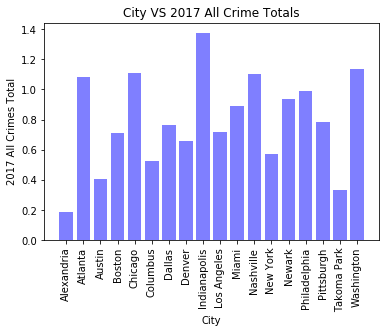

In [32]:
# Now let's plot these!!!



plt.bar(merged_df3['City'], merged_df3['Crime Rate per 100 people'], color='b', alpha=0.5, align="center")

# Set the upper and lower limits of our y axis
#plt.ylim(3000,3030)

# Set the upper and lower limits of our x axis
#plt.xlim(0,len(crime_data_df))

# Create a title, x label, and y label for our chart
plt.title("City VS 2017 All Crime Totals")
plt.xlabel("City")
plt.ylabel("2017 All Crimes Total")
plt.xticks(rotation=90)
# Save an image of the chart and print to screen
#plt.savefig("Crime Totals 2017.png")
plt.show()

In [ ]:
#  WOW-- THAT sure didn't work. Let's try it again for 2016 and see what happens...


plt.scatter(crime_data_df['City'], crime_data_df['2016 All Crimes Total'], marker="o", facecolors="red", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(100, 200)

# Set the upper and lower limits of our x axis
plt.xlim(0,20)

# Create a title, x label, and y label for our chart
plt.title("City VS 2016 All Crime Totals")
plt.xlabel("City")
plt.ylabel("Crimes Observed")

# Save an image of the chart and print to screen
plt.savefig("Crime Totals 2016.png")
plt.show()

In [ ]:
#  Maybe "Three's The Charm" ??????



plt.scatter(crime_data_df['City'], crime_data_df['2015 All Crimes Total'], marker="o", facecolors="red", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(2000,10000)

# Set the upper and lower limits of our x axis
plt.xlim(0,200)

# Create a title, x label, and y label for our chart
plt.title("City VS 2015 All Crime Totals")
plt.xlabel("City")
plt.ylabel("Crimes Observed")

# Save an image of the chart and print to screen
plt.savefig("Crime Totals 2015.png")
plt.show()